# Implementação do algoritmo Naive Bayes na língua Kãnnhũ

Aluna: Renata Leite Leandro

Link para acessar o conjunto de dados (localizado no final do arquivo): https://docs.google.com/document/d/1moCBlv52pPVTJ3cTrdmWae1bYxbGd1Br5ynq5AF3HBI/edit?usp=sharing

## Introdução:

O objetivo deste trabalho será a implementação do algoritmo Naive Bayes para a classificação de um pequeno conjunto de dados elaborado na língua Kãnnhũ (conlang). A ideia é que, nesta língua, o substantivo "nhemnna" é ambíguo, podendo significar tanto "dança" quanto "movimento do balançar das folhas das árvores". Assim, este trabalho consistirá numa tentativa de desambiguação desse termo através da diferenciação de seu contexto pelo algoritmo Naive Bayes, que verificará quais palavras mais frequentemente acompanham cada significado.

Vamos iniciar a leitura das bibliotecas necessárias e dos datasets:

In [ ]:
# Importando as bibliotecas necessárias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lendo o dataset:
train = pd.read_csv('/content/drive/MyDrive/LPLN IME 2023/train.csv')
test = pd.read_csv('/content/drive/MyDrive/LPLN IME 2023/test.csv')
test_labels = pd.read_csv('/content/drive/MyDrive/LPLN IME 2023/test labels.csv')

Agora, vamos apresentar os dados de treino. Lembrando que, por ser apenas um trabalho experimental, nossos dados são bastante reduzidos, com apenas 4 frases para compor o conjunto de treino e 8 para o conjunto de teste. Veja:

In [ ]:
# Apresentando o dataset de treino:
train.head()

,frase,label
0,the dgke dzĩ thujbi ij gĩmzo nhemnna tsej pu qo,dança
1,the dgke thuse gĩmzo ij nhemnna xemi,dança
2,qgo dgku jĩmem nhĩrran nhemnna kĩbũ qo,balançar das folhas
3,the dgke thuse tsethi ij nhemnna nnarimisenko,balançar das folhas


## Pré-processamento dos dados

Primeiramente, precisamos limpar os nossos dados para que, em seguida, eles possam ser transformados aplicados ao modelo. Como não há nenhuma letra maiúscula ou caractere não alfabético em nossos dados, precisamos apenas nos livrar das stopwords.

In [ ]:
# Importando as dependências necessárias:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Estabelencendo uma lista de stopwords para a nossa conlang:
stopwords = ['the', 'rã', 'qgo', 'ngke', 'dgke', 'dgku', 'ij', 'be', 'qo', 'tsej', 'nhĩrran', 'dã', 'zã']

def clean_text(sentences):
  """ Função que limpa as frases do dataset.
  Entrada: uma lista de frases.
  Saída: uma lista de frases limpas.     """
  # Separando as frases em palavras:
  tokenized_sent = [word_tokenize(i) for i in sentences]
  # Removendo todas as stopwords:
  sentencelist = []
  for sent in tokenized_sent:
    wordlist = [word for word in sent if word not in stopwords]
    wordlist = ' '.join(wordlist)
    sentencelist += [wordlist]
  return sentencelist

# Aplicando a função de limpeza nos nossos dados:
clean_train = clean_text(train['frase'])
clean_test = clean_text(test['frase'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Veja o resultado nos dados de treino:

In [ ]:
print(clean_train)

['dzĩ thujbi gĩmzo nhemnna pu', 'thuse gĩmzo nhemnna xemi', 'jĩmem nhemnna kĩbũ', 'thuse tsethi nhemnna nnarimisenko']


Agora que as frases encontram-se limpas, passaremos para a classificação dos dados com o Naive Bayes.

## Implementação do algoritmo Naive Bayes

Antes de usarmos o classificador, convém explicar que, na verdade, "Naive Bayes" é um termo genérico que se refere apenas a característica mais geral do classificador (isto é, a ingênua suposição de que as features são todas independentes entre si e igualmente importantes), não especificando, portanto, o tipo de distribuição assumida pelas features, que podem ser tanto contínuas quanto discretas. Por tal motivo, o Naive Bayes pode ser encontrado em três diferentes versões: Naive Bayes Multinomial (para dados discretos), Naive Bayes Gaussiano (para dados contínuos) e Naive Bayes de Bernoulli (para dados booleanos).

Neste problema, usaremos o Naive Bayes Multinomial, que, embora mais simples e limitado, serve para dados que não podem ser representados numericamente, sendo, por isso, muito utilizado em problemas de classificação de texto.

A ideia seguida por tal algoritmo é bastante simples:

- primeiro, visto que nossos dados são textuais, precisaríamos transformá-los em suas versões numéricas;
- depois, com os dados de treino, encontraríamos as probabilidades condicionais P(A|B) = P(A∩B) / P(B) -> P(palavra|classe) = P(palavra∩classe) / P(classe);
- por último, sabendo quais as probabilidades de cada palavra pertencer às diferentes classe, conseguiríamos encontrar qual a probabilidade de uma frase pertencer a uma determinada classe, considerando apenas as palavras que a compõem.

Como usaremos a biblioteca do sklearn para implementarmos nosso algoritmo, não precisaremos, porém, entrar em nenhum desses detalhes. Veja:

In [ ]:
# Importando as dependências necessárias:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Criando o modelo:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Treinando o modelo com os dados de treino:
model.fit(clean_train, train['label'])

# Predizendo as categorias dos dados de teste:
predicted_categories = model.predict(clean_test)

Agora, resta-nos ver o desempenho do modelo para aplicar algumas mudanças, caso necessário.

A acurácia encontrada é de: 0.875


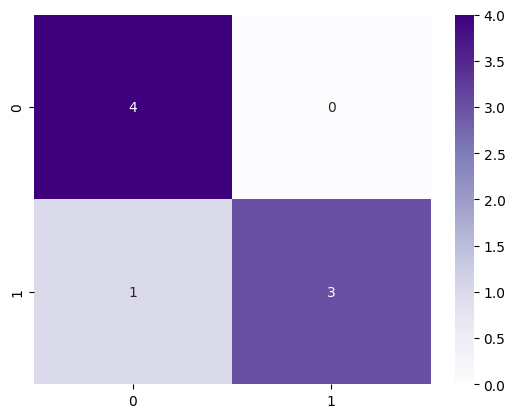

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Plotando uma matriz de confusão:
matrix = confusion_matrix(test_labels, predicted_categories)

sns.heatmap(matrix, annot=True, cmap='Purples')

# Verificando a acurácia:
accuracy = accuracy_score(test_labels, predicted_categories)
print('A acurácia encontrada é de:', accuracy)

Verificando a frase problemática pelos datasets, podemos ver que o erro encontra-se na sentença


In [ ]:
print(clean_test[3])

jĩmem nhemnna pu


que, em sua totalidade, significa "veja a dança do menino". Porém, após a remoção das stopwords restaram apenas as palavras "ver" + "pessoa", sem o determinante definido masculino (tsej). Assim, uma possível resolução para o erro do classificador está na reconsideração das stopwords, já que, embora determinantes sejam normalmente irrelevantes, nesse caso, o indicativo de gênero, mais relacionado a pessoas que objetos, pode ser útil para indicar que a frase trata de uma dança "humana". Vamos verificar se tal hipótese se concretiza:

A acurácia encontrada é de: 1.0


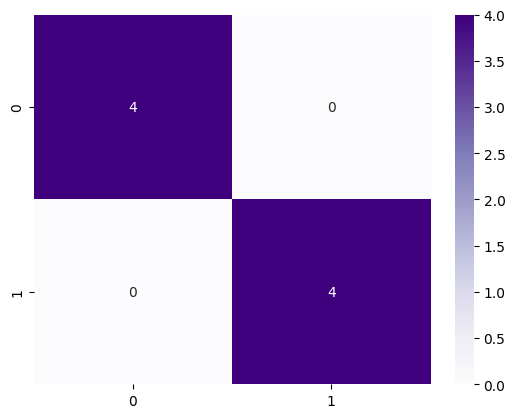

In [ ]:
# Reestabelencendo uma lista de stopwords para a nossa conlang:
stopwords = ['the', 'rã', 'qgo', 'ngke', 'dgke', 'dgku', 'ij', 'be', 'qo', 'nhĩrran', 'dã', 'zã']
# Reaplicando a função de limpeza nos nossos dados:
clean_train = clean_text(train['frase'])
clean_test = clean_text(test['frase'])

# Treinando o modelo com os novos dados de treino:
model.fit(clean_train, train['label'])
# Predizendo as categorias dos dados de teste:
new_predicted_categories = model.predict(clean_test)

# Plotando uma matriz de confusão:
matrix = confusion_matrix(test_labels, new_predicted_categories)
sns.heatmap(matrix, annot=True, cmap='Purples')
# Verificando a acurácia:
accuracy = accuracy_score(test_labels, new_predicted_categories)
print('A acurácia encontrada é de:', accuracy)

E, finalmente, temos nossos dados devidamente classificados!